# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [2]:
!python3 -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.2 MB 2.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


In [3]:
#!pip install --upgrade spacy

# Etapa 2: Carregamento da base de dados

In [4]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding = 'utf-8')

In [5]:
base_dados.shape

(196, 2)

In [6]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [7]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


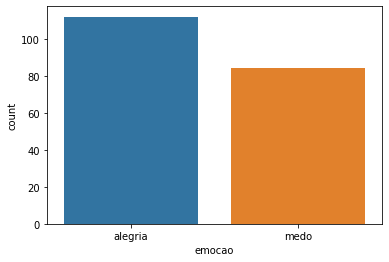

In [8]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

# Função para pré-processamento dos Textos

In [9]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [11]:
print(stop_words)

{'área', 'um', 'outra', 'grupo', 'tens', 'seu', 'quinze', 'sem', 'pouca', 'estas', 'grandes', 'naquele', 'aquele', 'dezoito', 'lá', 'estado', 'próprio', 'estava', 'quarta', 'és', 'pôde', 'caminho', 'falta', 'pela', 'ademais', 'vez', 'pode', 'sois', 'dão', 'fazia', 'obrigado', 'segunda', 'já', 'nesta', 'outras', 'atrás', 'poderá', 'tanta', 'fazer', 'eles', 'quer', 'aos', 'estes', 'somente', 'tentaram', 'aqueles', 'talvez', 'quatro', 'desse', 'onze', 'nas', 'zero', 'se', 'da', 'meses', 'dos', 'te', 'são', 'umas', 'vossas', 'que', 'vezes', 'apontar', 'sua', 'sob', 'vós', 'maior', 'na', 'nível', 'dizer', 'geral', 'certamente', 'estar', 'teus', 'ser', 'dá', 'novo', 'posso', 'maioria', 'dezasseis', 'ver', 'aquela', 'quê', 'portanto', 'só', 'estão', 'esse', 'mil', 'os', 'pouco', 'seria', 'nem', 'meus', 'favor', 'muito', 'cento', 'questão', 'ir', 'baixo', 'custa', 'fim', 'essa', 'cujo', 'mês', 'nossa', 'seus', 'menor', 'onde', 'nuns', 'terceiro', 'nove', 'cima', 'tudo', 'deve', 'dizem', 'coisa

In [12]:
len(stop_words)

413

In [13]:
pln = spacy.load('pt_core_news_sm')

In [14]:
pln

In [15]:
def pre_processamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  return lista

In [16]:
teste = pre_processamento('Estou aprendendo processamento 1 10 23 de linguagem natural, curso em Rio de Janeiro')
teste

'aprender processamento linguagem natural cursar rir janeiro'

# Pré-processamento da base de dados

## Limpeza dos textos

In [17]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [18]:
base_dados['texto'] = base_dados['texto'].apply(pre_processamento)

In [19]:
base_dados.head()

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria


## Tratamento da classe

In [20]:
exemplo_base_dados = [['este trabalho é agradável', {"ALEGRIA": True, "MEDO": False}],
                      ['este lugar conitnua assustador', {"ALEGRIA": False, "MEDO": True}]]

In [21]:
type(exemplo_base_dados)

list

In [22]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [23]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [24]:
type(exemplo_base_dados[0][1])

dict

In [25]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [26]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

In [27]:
len(base_dados_final)

196

In [28]:
base_dados_final[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [29]:
base_dados_final[0][0]

'trabalhar agradável'

In [30]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

# Criação do classificador

In [32]:
# !pip uninstall spacy

In [33]:
# !pip install spacy==2.2.3

In [31]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [34]:
random.shuffle(base_dados_final)

In [35]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
   textos = [modelo(texto) for texto, entities in batch]
   annotations = [{'cats': entities} for texto, entities in batch]
   modelo.update(textos,annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses) 

{'textcat': 0.006726052844896913}
{'textcat': 1.818336636816298e-07}
{'textcat': 5.811497860719328e-08}
{'textcat': 2.6439725742122278e-08}
{'textcat': 1.84788222501453e-08}
{'textcat': 1.1152286205629025e-08}
{'textcat': 7.719071437595204e-09}
{'textcat': 5.625087562410869e-09}
{'textcat': 4.831388927817315e-09}
{'textcat': 4.801149366961965e-09}


In [36]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [37]:
historico_loss = np.array(historico_loss)
historico_loss

array([6.72605284e-03, 1.81833664e-07, 5.81149786e-08, 2.64397257e-08,
       1.84788223e-08, 1.11522862e-08, 7.71907144e-09, 5.62508756e-09,
       4.83138893e-09, 4.80114937e-09])

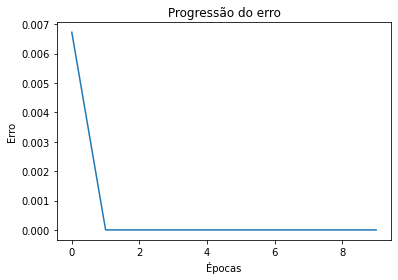

In [38]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.show();

In [39]:
modelo.to_disk("modelo")

# Testes com uma frase

In [40]:
modelo_carregado = spacy.load('modelo')

In [41]:
modelo_carregado

In [42]:
texto_positivo = 'eu adoro a cor dos seus olhos'
texto_positivo = pre_processamento(texto_positivo)
texto_positivo

'adorar o cor olho'

In [43]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar o cor olho

In [44]:
previsao.cats

{'ALEGRIA': 0.9998936653137207, 'MEDO': 0.00018480763537809253}

In [45]:
texto_negativo = 'estou com medo do escuro'
texto_negativo = pre_processamento(texto_negativo)
texto_negativo

'medo escuro'

In [46]:
previsao = modelo_carregado(texto_negativo)
previsao

medo escuro

In [47]:
previsao.cats

{'ALEGRIA': 0.05356074869632721, 'MEDO': 0.8732336163520813}

# Avaliação do modelo

## Avaliação na base de treinamento

In [48]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [49]:
previsoes

[{'ALEGRIA': 0.9995985627174377, 'MEDO': 0.00025106253451667726},
 {'ALEGRIA': 0.9994879961013794, 'MEDO': 0.0007703145383857191},
 {'ALEGRIA': 0.9996439218521118, 'MEDO': 0.00037629963480867445},
 {'ALEGRIA': 0.9995997548103333, 'MEDO': 0.00029684812761843204},
 {'ALEGRIA': 0.9999395608901978, 'MEDO': 0.0001117887077271007},
 {'ALEGRIA': 0.9997134804725647, 'MEDO': 0.00020082085393369198},
 {'ALEGRIA': 0.9998936653137207, 'MEDO': 0.00018480763537809253},
 {'ALEGRIA': 0.9991322159767151, 'MEDO': 0.0004533222527243197},
 {'ALEGRIA': 0.9997475743293762, 'MEDO': 0.0002674073330126703},
 {'ALEGRIA': 0.9994125366210938, 'MEDO': 0.00032860212377272546},
 {'ALEGRIA': 0.9997988343238831, 'MEDO': 7.876311428844929e-05},
 {'ALEGRIA': 0.9998210072517395, 'MEDO': 8.305602386826649e-05},
 {'ALEGRIA': 0.9997555613517761, 'MEDO': 0.00010562679381109774},
 {'ALEGRIA': 0.9995380640029907, 'MEDO': 0.0003022455202881247},
 {'ALEGRIA': 0.9993801116943359, 'MEDO': 0.0006965126376599073},
 {'ALEGRIA': 0.999

In [50]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [51]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [52]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [54]:
accuracy_score(respostas_reais, previsoes_final)

1.0

In [55]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [56]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding = 'utf-8')

In [58]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [59]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(pre_processamento)

In [60]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [61]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [62]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [63]:
respostas_reais = base_dados_teste['emocao'].values


In [64]:
accuracy_score(respostas_reais, previsoes_final)

0.5357142857142857

In [65]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[33, 15],
       [24, 12]])